[Table of Contents](table_of_contents.ipynb)

# Topic 6.  Projection Operators

Author: Alexander Petrie     
Email: alexander.petrie@gmail.com
    

##  Introduction

A projection is a mapping of some space onto a subspace of the original space. A **projection operator** is a linear operator P that maps a space to the subspace. In order for an operater to be a projection operator, it must be idempotent. This means that whenever P is applied twice to any value, it gives the same result as if it were applied just once. i.e. $P^2 = P$. One example of a projection is mapping a 3D object onto a 2D subspace. This is done in video games. The graphics are often generated in a 3D environment and they are then projected onto a 2D screen so we can see them. A projection is an orthogonal projection if its range and nullspace are orthogonal. 

##  Explaination of the theory
Let $W$ be a finite dimentional vector space and $P$ be a projection on $W$. Suppose the subspaces $U$ avnd $V$ are the range and null space of $P$ respectively. 

### Properties of a projection operator
* $P^2 = P$ ($P$ is *idempotent*)
    * This means that if you use $P$ to try to operate on a value that has already been operated on by $P$, the value will not change.      
    
    
* $\forall \, x \in U \, \colon \, Px = x$
    * This means that if $P$ operates on some value in the range space of $P$, that value does not change.
    
    
* There is a direct sum $W = U \bigoplus V$. Every vector x in $W$ my be decomposed as x = u + v where u is in range of $P$ and v is in the null space of $P$
    * In other words: if $P\,\colon\;W\rightarrow W$, then $W = \mathcal{R}(P) + \mathcal{N}(P)$
    
    
* The range and null space of a projection are complimentary, meaning they are disjoint.


* If $P$ is a projection, $(I - P)$ is also a projection.
    * Proof: $(I-P)^2 = (I-P)(I-P)$      
    $=I-P-P-P^2 = I - P - P + P$      
    $= I-P$
    
    
* $P$ projects onto the range space $U$.  $(I-P)$ projects onto the null space $V$.

### Orthogonal projections
When $U$ (range space of $P$) and $V$ (null space of $P$) are orthogonal subspaces, ($\mathcal{R}(P)\, \bot\,\mathcal{N}(P)$), $P$ is an **orthogonal projection**. Orthogonal projections are very useful because if you can orthgonally project a value onto a subspace, that projection is the closest representation of the value on that subspace (see engineering example at the end). 

## Simple Numerical Example

### Example 1

This first example is an orthogonal projection of a vector in $\mathbb{R}^2$ to the line y = 0. It orthogonally projects all points in $\mathbb{R}^2$ to this line.   
The projection matrix is:
$$
   P=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 0 \\
  \end{array} } \right]
$$

You can verify it is a projection by computing $P^2 = P$.          
You can change the x and y points in the code and it will show how they project onto the line y = 0.

Text(0,0.5,'y - axis')

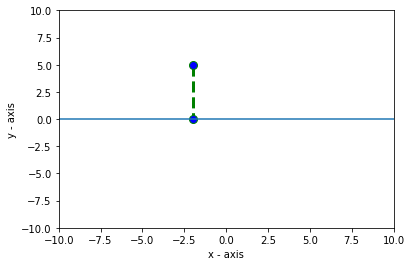

In [54]:
import numpy as np
import matplotlib.pyplot as plt 

# Change the variables below (keep values between -10 and 10)
x = -2
y = 5

# Form vector (in R2) z from points x and y
z = np.array([[x],[y]])

#Form projection matrix
P = np.array([[1,0],[0,0]])

#project z onto line y = 0
z_proj = np.dot(P,z)

#plot result
plt.plot([z[0],z_proj[0]],[z[1],z_proj[1]],color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot([-10,10],[0,0])
# x-axis label 
plt.xlabel('x - axis') 
# frequency label 
plt.ylabel('y - axis') 

### Example 2

This example is similar to the first in that it maps all points in $\mathbb{R}^2$ to a line. However, now the line is y = x. 
The projection matrix in this case is: 

$$
   P=
  \left[ {\begin{array}{cc}
   0.5 & 0.5 \\
   0.5 & 0.5 \\
  \end{array} } \right]
$$    
You can change the x and y points in the code and it will show how they project onto the line y = x.

(-11.0, 11.0, -11.0, 11.0)

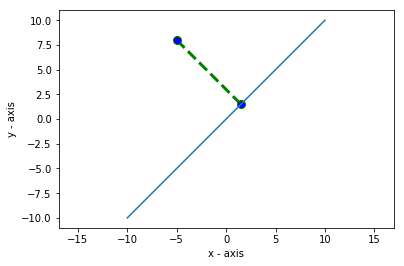

In [67]:
import numpy as np
import matplotlib.pyplot as plt 

# Change the variables below (keep values between -10 and 10)
x = -5
y = 8

# Form vector (in R2) z from points x and y
z = np.array([[x],[y]])

#Form projection matrix
P = np.array([[0.5,0.5],[0.5,0.5]])

#project z onto line y = 0
z_proj = np.dot(P,z)

#plot result
plt.plot([z[0],z_proj[0]],[z[1],z_proj[1]],color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.plot([-10,10],[-10,10])
# x-axis label 
plt.xlabel('x - axis') 
# frequency label 
plt.ylabel('y - axis') 
plt.axis('equal')

## An Engineering Application

If we are given a point $x \in S$, suppose that we would like to approximate $x$ with a point in $V \subset S$. Assuming that $x \notin V$, we need to find the point in $V$ that is closest to $x$. This point is given by the orthogonal projection of $x$ onto $V$. 

In this example, let $V$ be the plane in $\mathbb{R}^3$ spanned by the vectors $
  y = \left[ {\begin{array}{c}
   1  \\
   0  \\
   1  \\
  \end{array} } \right]
$
and
$
  z =\left[ {\begin{array}{c}
   0 \\
    1 \\
    1 \\
  \end{array} } \right]
$.

If $
A=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   0 & 1 \\
   1 & 1 \\
  \end{array} } \right]
$ 
then the projection matrix that projects points in $\mathbb{R}^3$ orthogonally onto the plane spanned by $y$ and $z$ is described by $P = A(A^HA)^{-1}A^H$. Note that the columns of $A$ are the vectors that span $V$. In the python code below, we project the vector 
$
  q =\left[ {\begin{array}{c}
   7 \\
    8 \\
    9 \\
  \end{array} } \right]
$
onto the plane $V = span(x,y)$, and get $
  Pq =\left[ {\begin{array}{c}
   5 \\
    6 \\
    11 \\
  \end{array} } \right]
$.

This vector is the closest approximation of $q$ on $V$.

In [91]:
import numpy as np

A = np.array([[1, 0],[0, 1],[1, 1]])
T = np.linalg.inv(np.dot(A.T,A))
P = np.dot(T,A.T)
P = np.dot(A,P)
print('This is the projection matrix')
print(P)

q = np.array([[7],[8],[9]])
Pq = np.dot(P,q)
print('This is the approximation on the plane V')
print(Pq)

This is the projection matrix
[[ 0.66666667 -0.33333333  0.33333333]
 [-0.33333333  0.66666667  0.33333333]
 [ 0.33333333  0.33333333  0.66666667]]
This is the approximation on the plane V
[[ 5.]
 [ 6.]
 [11.]]
